# Analysing and comparing statistics of different generation methods

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle as pkl
from tabulate import tabulate

In [3]:
# Load the statistics
path_random = '..\..\datasets\\100random\\100\statistics' 
random_efficiencies = pkl.load(open(path_random + "\effiencies.pkl", 'rb'))
length_cf_random = pkl.load(open(path_random + "\lengths_cf.pkl", 'rb'))
length_org_random = pkl.load(open(path_random + "\lengths_org.pkl", 'rb'))
start_points_random = pkl.load(open(path_random + "\start_points.pkl", 'rb'))

path_step = '..\..\datasets\\100step\\100\statistics'
step_efficiencies = pkl.load(open(path_step + "\effiencies.pkl", 'rb'))[:100]
length_cf_step = pkl.load(open(path_step + "\lengths_cf.pkl", 'rb'))[:100]
length_org_step = pkl.load(open(path_step + "\lengths_org.pkl", 'rb'))[:100]
start_points_step = pkl.load(open(path_step + "\start_points.pkl", 'rb'))[:100]

path_mcts = '..\..\datasets\\100mcts\\100\statistics'
mcts_efficiencies = pkl.load(open(path_mcts + "\effiencies.pkl", 'rb'))
length_cf_mcts = pkl.load(open(path_mcts + "\lengths_cf.pkl", 'rb'))
length_org_mcts = pkl.load(open(path_mcts + "\lengths_org.pkl", 'rb'))
start_points_mcts = pkl.load(open(path_mcts + "\start_points.pkl", 'rb'))

In [12]:
weight = {'validity': 1, 'proximity': 1, 'critical_state': 0.5, 'diversity': 0.5, 'realisticness': 0.2, 'sparsity': 0.5}
with open('..\..\interpretability\\normalisation_values.pkl', 'rb') as f:
    normalisation = pkl.load(f)

mcts_prox, step_prox, random_prox = [], [], []
mcts_val, step_val, random_val = [], [], []
mcts_div, step_div, random_div = [], [], []
mcts_crit, step_crit, random_crit = [], [], []
mcts_real, step_real, random_real = [], [], []
mcts_spar, step_spar, random_spar = [], [], []
mcts_qc, step_qc, random_qc = [], [], []

with open('..\..\interpretability\logs\qc_comparison2.txt', 'r') as f:
    for line in f:
        parts = line.split(' ')
        if 'validity' in line:
            mcts_val.append(float(parts[1]) / normalisation['validity'] * weight['validity'])
            step_val.append(float(parts[2]) / normalisation['validity'] * weight['validity'])
            random_val.append(float(parts[3]) / normalisation['validity'] * weight['validity'])
        elif 'diversity' in line:
            mcts_div.append(float(parts[1]) / normalisation['diversity'] * weight['diversity'])
            step_div.append(float(parts[2]) / normalisation['diversity'] * weight['diversity'])
            random_div.append(float(parts[3]) / normalisation['diversity'] * weight['diversity'])
        elif 'proximity' in line:
            mcts_prox.append(- float(parts[1]) / normalisation['proximity'] * weight['proximity'])
            step_prox.append(-float(parts[2]) / normalisation['proximity'] * weight['proximity'])
            random_prox.append(-float(parts[3]) / normalisation['proximity'] * weight['proximity'])
        elif 'critical' in line:
            mcts_crit.append(float(parts[1]) / normalisation['critical_state'] * weight['critical_state'])
            step_crit.append(float(parts[2]) / normalisation['critical_state'] * weight['critical_state'])
            random_crit.append(float(parts[3]) / normalisation['critical_state'] * weight['critical_state'])
        elif 'realistic' in line:
            mcts_real.append(float(parts[1])   / normalisation['realisticness'] * weight['realisticness'])
            step_real.append(float(parts[2])   / normalisation['realisticness'] * weight['realisticness'])
            random_real.append(float(parts[3]) / normalisation['realisticness'] * weight['realisticness'])
        elif 'sparsity' in line:
            mcts_spar.append(float(parts[1]) / normalisation['sparsity'] * weight['sparsity'])
            step_spar.append(float(parts[2]) / normalisation['sparsity'] * weight['sparsity'])
            random_spar.append(float(parts[3]) / normalisation['sparsity'] * weight['sparsity'])
qc_mcts = [sum(x) for x in zip(mcts_prox, mcts_val, mcts_div, mcts_crit, mcts_real, mcts_spar)]
qc_step = [sum(x) for x in zip(step_prox, step_val, step_div, step_crit, step_real, step_spar)]
qc_random = [sum(x) for x in zip(random_prox, random_val, random_div, random_crit, random_real, random_spar)]

In [13]:
table = [
    ['statistics'] + ['mcts'] + ['step'] + ['random'],
    ['efficiency'] + [round(np.mean(mcts_efficiencies), 2)] + [round(np.mean(step_efficiencies), 2)] + [round(np.mean(random_efficiencies), 2)],
    ['length cf'] + [round(np.mean(length_cf_mcts), 2)] + [round(np.mean(length_cf_step), 2)] + [round(np.mean(length_cf_random), 2)],
    ['length org'] + [round(np.mean(length_org_mcts), 2)] + [round(np.mean(length_org_step), 2)] + [round(np.mean(length_org_random), 2)],
    ['start points'] + [round(np.mean(start_points_mcts), 2)] + [round(np.mean(start_points_step), 2)] + [round(np.mean(start_points_random), 2)],
     ['----------'] + ['----------'] + ['----------'] + ['----------'],
    ['validity'] + [round(np.mean(mcts_val), 2)] + [round(np.mean(step_val), 2)] + [round(np.mean(random_val), 2)],
    ['proximity'] + [round(np.mean(mcts_prox), 2)] + [round(np.mean(step_prox), 2)] + [round(np.mean(random_prox), 2)],
    ['diversity'] + [round(np.mean(mcts_div), 2)] + [round(np.mean(step_div), 2)] + [round(np.mean(random_div), 2)],
    ['critical'] + [round(np.mean(mcts_crit), 2)] + [round(np.mean(step_crit), 2)] + [round(np.mean(random_crit), 2)],
    ['realistic'] + [round(np.mean(mcts_real), 2)] + [round(np.mean(step_real), 2)] + [round(np.mean(random_real), 2)],
    ['sparsity'] + [round(np.mean(mcts_spar), 2)] + [round(np.mean(step_spar), 2)] + [round(np.mean(random_spar), 2)],
    ['qc'] + [round(np.mean(qc_mcts), 2)] + [round(np.mean(qc_step), 2)] + [round(np.mean(qc_random), 2)]
]

print(tabulate(table, headers='firstrow'))

statistics    mcts        step        random
------------  ----------  ----------  ----------
efficiency    54.48       7.61        5.34
length cf     2.01        6.08        6.91
length org    2.01        5.43        6.77
start points  24.34       20.71       40.38
----------    ----------  ----------  ----------
validity      1.25        2.3         0.8
proximity     -1.79       -1.5        -1.48
diversity     0.39        0.45        0.59
critical      -0.71       -1.19       -2.53
realistic     0.1         0.27        0.06
sparsity      -0.29       -1.41       -1.27
qc            -1.05       -1.08       -3.83


### Observations

MCTS is by far the slowest. This makes sense, because it considers many more options.

MCTS makes much shorter trajectories (basically always minimum length). This indicates 
- that diversity is not properly optimised for
- the quality criteria are not traded-off well against each other

The length of MCTS org and cf trajectories are the same (this is built into the method), while step and random have different lengths.
- These are differences in when I decide to end the trajectories. A good ablation would make try to reduce these effect by e.g. ending originals of step at the same timestep as the cf

For step the trajectories in the counterfactual are longer than the originals. Maybe this is built in to the method? But I think it's more likely the byproduct of some quality criteria incentivising this difference in lengths.

MCTS starts slightly later than step. Random starts much later because it has uniformly distributed starting points.

### Quality Criteria


# Analysing quality criterias

I will visualize the distribution of quality criteria

Text(0.5, 1.0, 'Quality Criteria Random')

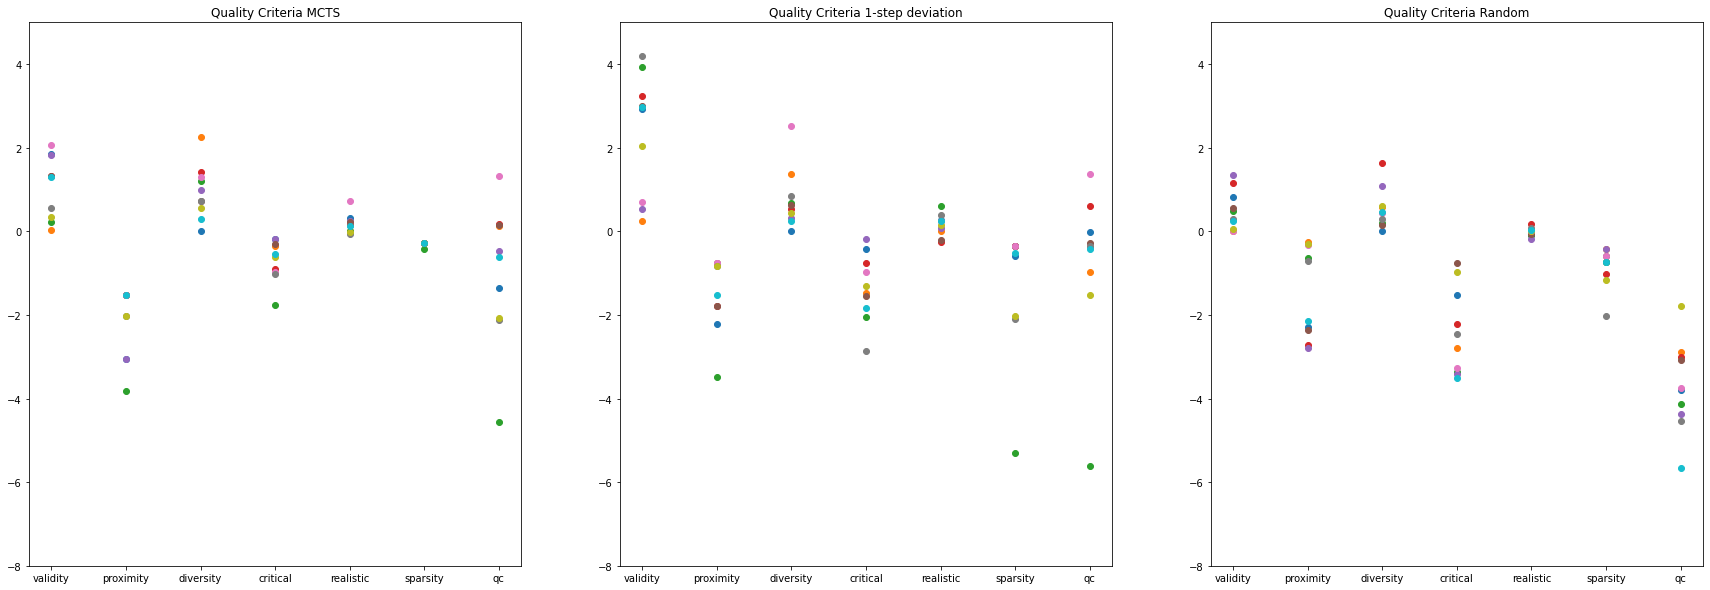

In [14]:
number_of_points = 10

zipped_mcts = [(mcts_val[i], mcts_prox[i], mcts_div[i], mcts_crit[i], mcts_real[i], mcts_spar[i], qc_mcts[i]) for i in range(number_of_points)]
zipped_step = [(step_val[i], step_prox[i], step_div[i], step_crit[i], step_real[i], step_spar[i], qc_step[i]) for i in range(number_of_points)]
zipped_random = [(random_val[i], random_prox[i], random_div[i], random_crit[i], random_real[i], random_spar[i], qc_random[i]) for i in range(number_of_points)]

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
# set range of y-axis to [-8, 5]
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_mcts[i])
plt.title('Quality Criteria MCTS')

plt.subplot(1,3,2)
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_step[i])
plt.title('Quality Criteria 1-step deviation')


plt.subplot(1,3,3)
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_random[i])
plt.title('Quality Criteria Random')


In [15]:
# print the average and standard deviation of the statistics
table = [
    ['statistics'] + ['mcts mean'] + ['mcts std'] + ['step mean'] + ['step std'] + ['random mean'] + ['random std'],
    ['validity'] + [round(np.mean(mcts_val), 2), round(np.std(mcts_val), 2)] + [round(np.mean(step_val), 2), round(np.std(step_val), 2)] + [round(np.mean(random_val), 2), round(np.std(random_val), 2)],
    ['proximity'] + [round(np.mean(mcts_prox), 2), round(np.std(mcts_prox), 2)] + [round(np.mean(step_prox), 2), round(np.std(step_prox), 2)] + [round(np.mean(random_prox), 2), round(np.std(random_prox), 2)],
    ['diversity'] + [round(np.mean(mcts_div), 2), round(np.std(mcts_div), 2)] + [round(np.mean(step_div), 2), round(np.std(step_div), 2)] + [round(np.mean(random_div), 2), round(np.std(random_div), 2)],
    ['critical'] + [round(np.mean(mcts_crit), 2), round(np.std(mcts_crit), 2)] + [round(np.mean(step_crit), 2), round(np.std(step_crit), 2)] + [round(np.mean(random_crit), 2), round(np.std(random_crit), 2)],
    ['realistic'] + [round(np.mean(mcts_real), 2), round(np.std(mcts_real), 2)] + [round(np.mean(step_real), 2), round(np.std(step_real), 2)] + [round(np.mean(random_real), 2), round(np.std(random_real), 2)],
    ['sparsity'] + [round(np.mean(mcts_spar), 2), round(np.std(mcts_spar), 2)] + [round(np.mean(step_spar), 2), round(np.std(step_spar), 2)] + [round(np.mean(random_spar), 2), round(np.std(random_spar), 2)],
    ['qc'] + [round(np.mean(qc_mcts), 2), round(np.std(qc_mcts), 2)] + [round(np.mean(qc_step), 2), round(np.std(qc_step), 2)] + [round(np.mean(qc_random), 2), round(np.std(qc_random), 2)]
]

print(tabulate(table, headers='firstrow'))
# index of the highest qc_step
print(qc_step.index(max(qc_step)))
print(max(qc_step), min(qc_step))
print(max(qc_mcts), min(qc_mcts))
print(max(qc_random), min(qc_random))


statistics      mcts mean    mcts std    step mean    step std    random mean    random std
------------  -----------  ----------  -----------  ----------  -------------  ------------
validity             1.25        0.96         2.3         1.47           0.8           0.87
proximity           -1.79        0.48        -1.5         0.88          -1.48          1.09
diversity            0.39        0.29         0.45        0.51           0.59          0.5
critical            -0.71        0.44        -1.19        0.9           -2.53          0.93
realistic            0.1         0.26         0.27        0.49           0.06          0.35
sparsity            -0.29        0.01        -1.41        1.82          -1.27          0.78
qc                  -1.05        1.49        -1.08        1.8           -3.83          1.7
39
2.4990973803317194 -8.571911645527301
2.8838986128353876 -4.563430289458793
-0.05796851335157149 -9.279113969438772


### Observations
Step has a higher significantly variance in it's quality criteria than MCTS.

**Proximity** Both mcts and step don't do a great job at optimising for proximity. They are both worse than the random trajectories.

MCTS does worst at diversity and best and critical. This makes sense since they are built into the method.

Overall MCTS slightly outperforms Step, but at the cost of 10x computational time.

